# EDA

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv("E:\Folder\Customer-Survival-Analysis-and-Churn-Prediction Mrigen\Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysis

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

In [8]:
df.drop(["customerID"], inplace = True, axis = 1)

In [9]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, SeniorCitizen, Partner, Dependents

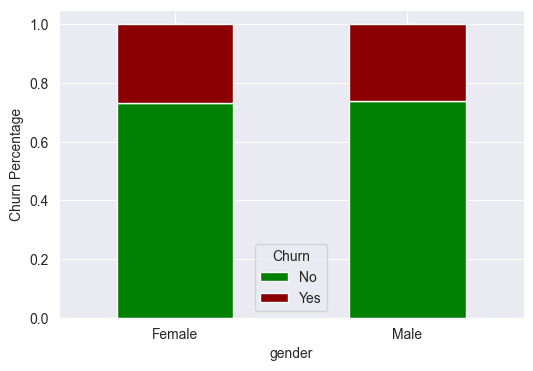

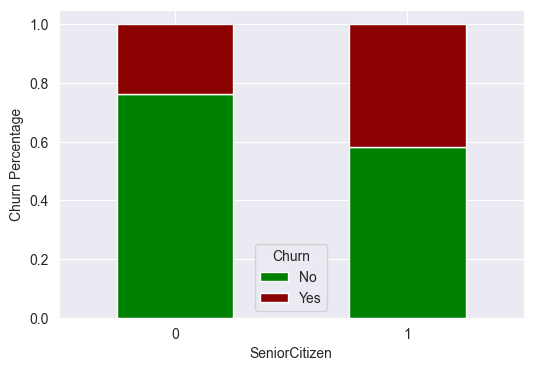

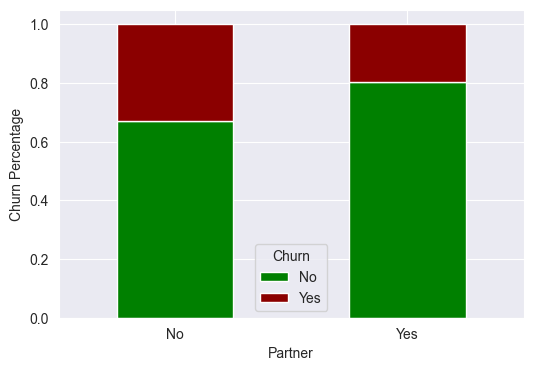

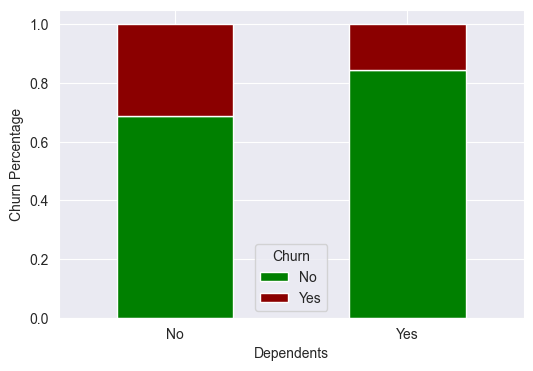

In [10]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

From above plots, we can say following:
- Gender alone does not help us predict the customer churn.
- If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

In [11]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     1437
Yes     229
Name: count, dtype: int64

In [12]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     921
Yes    242
Name: count, dtype: int64

In [13]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

Churn
No     278
Yes     75
Name: count, dtype: int64

In [14]:
df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

Churn
No     1872
Yes     847
Name: count, dtype: int64

### Tenure

In [15]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [16]:
df['tenure'].value_counts().head(10)

tenure
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
Name: count, dtype: int64

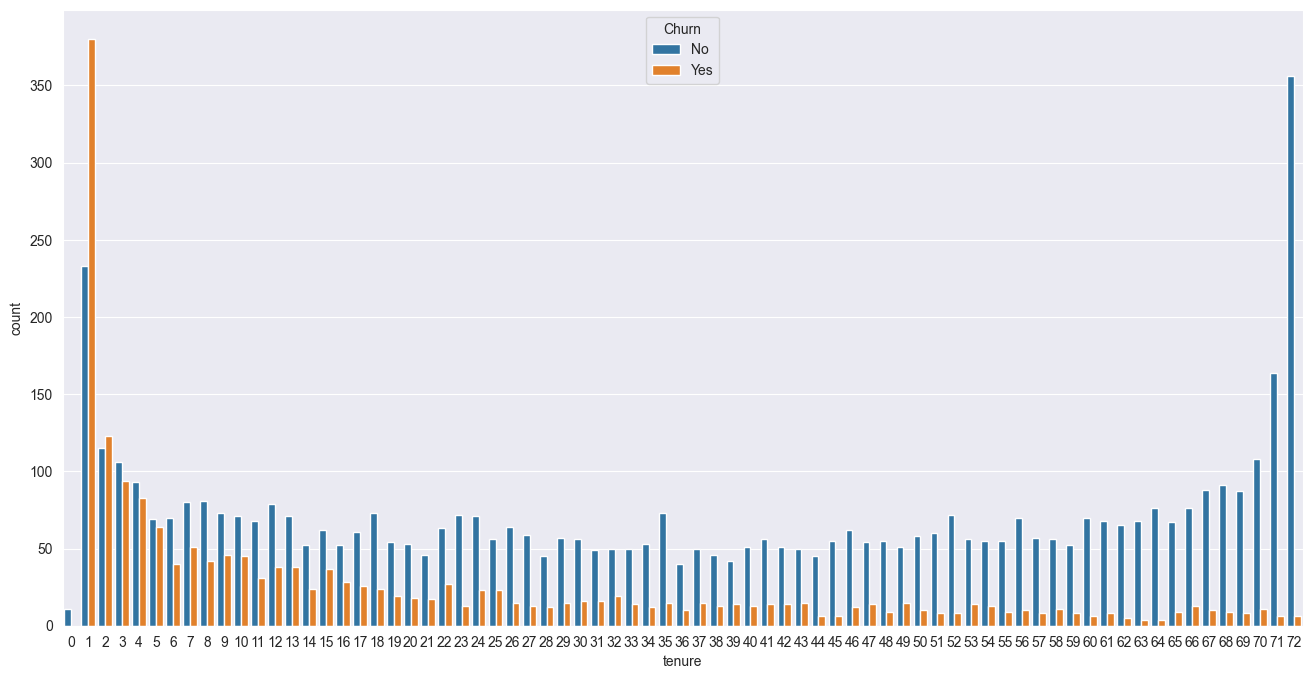

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [18]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [19]:
df["tenure_group"].value_counts()

tenure_group
1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

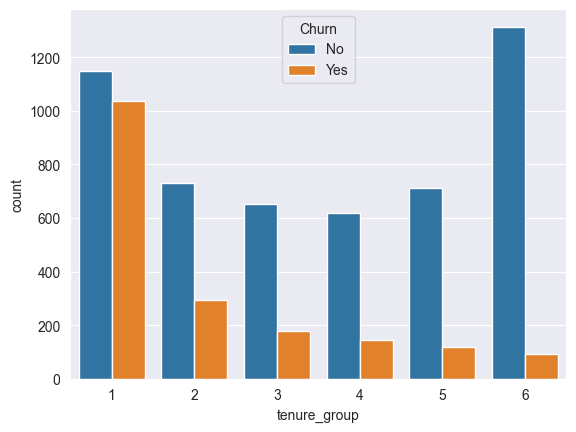

In [20]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

### Phone Service and MultipleLines 

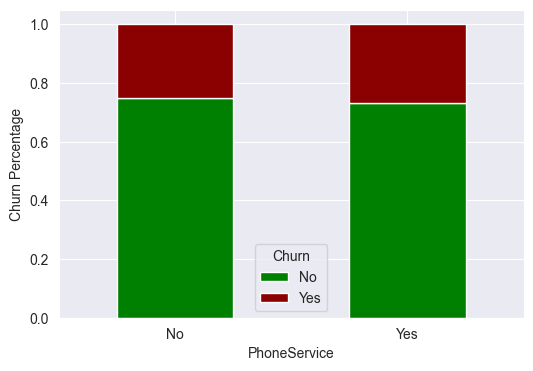

In [21]:
stacked_plot(df, "PhoneService", "Churn")

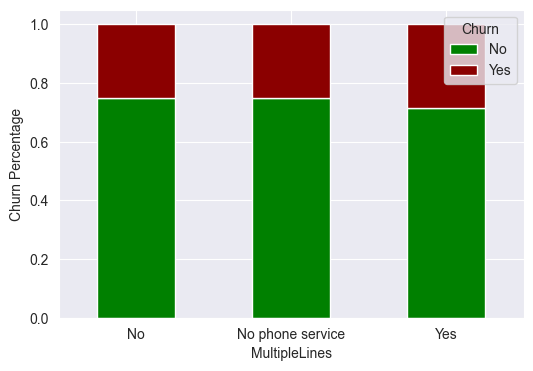

In [22]:
stacked_plot(df, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

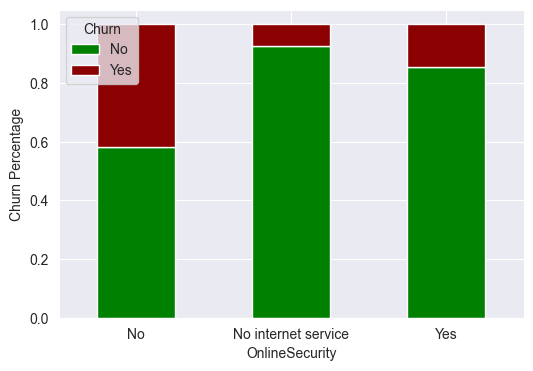

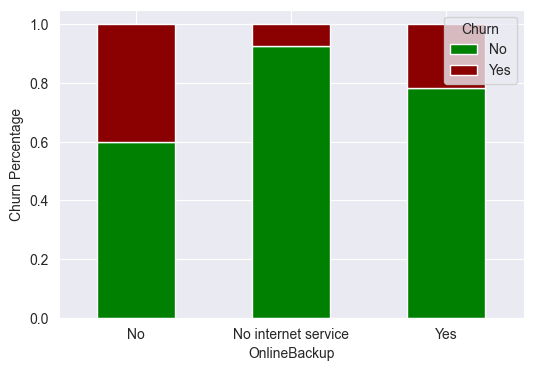

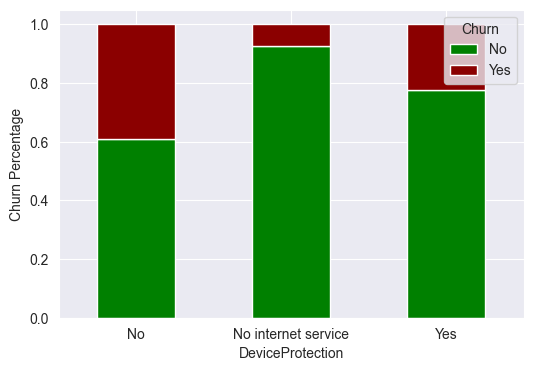

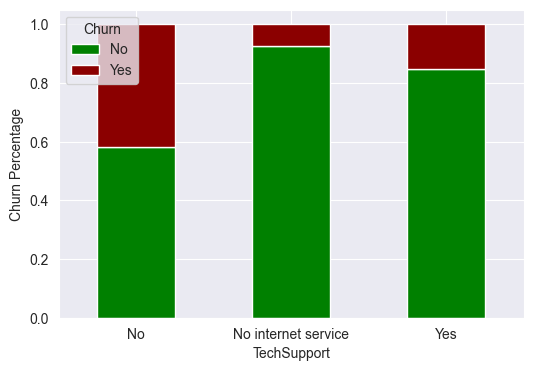

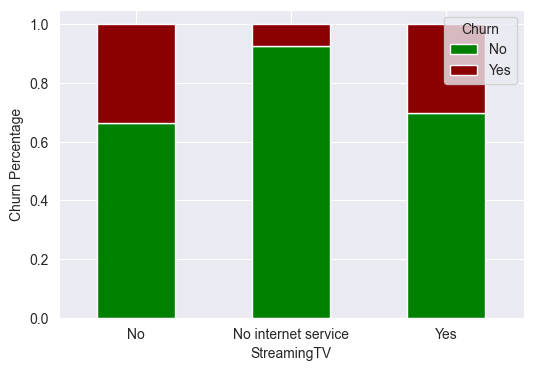

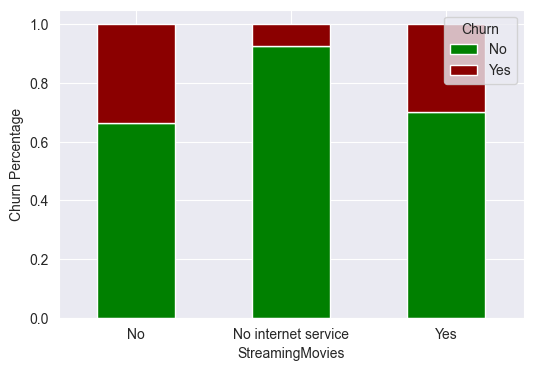

In [23]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

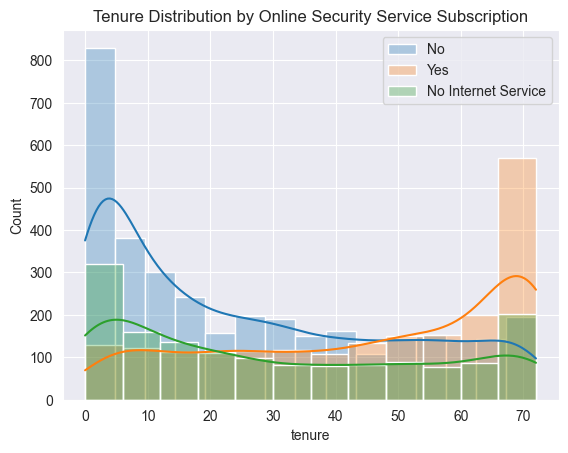

In [30]:
sns.histplot(df.tenure[df.OnlineSecurity == "No"], kde=True, alpha=0.3, label="No")
sns.histplot(df.tenure[df.OnlineSecurity == "Yes"], kde=True, alpha=0.3, label="Yes")
sns.histplot(df.tenure[df.OnlineSecurity == "No internet service"], kde=True, alpha=0.3, label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

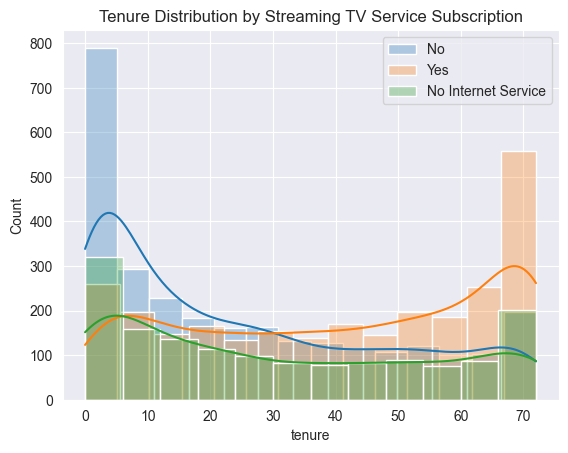

In [31]:
sns.histplot(df.tenure[df.StreamingTV == "No"], kde=True, alpha=0.3, label="No")
sns.histplot(df.tenure[df.StreamingTV == "Yes"], kde=True, alpha=0.3, label="Yes")
sns.histplot(df.tenure[df.StreamingTV == "No internet service"], kde=True, alpha=0.3, label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()




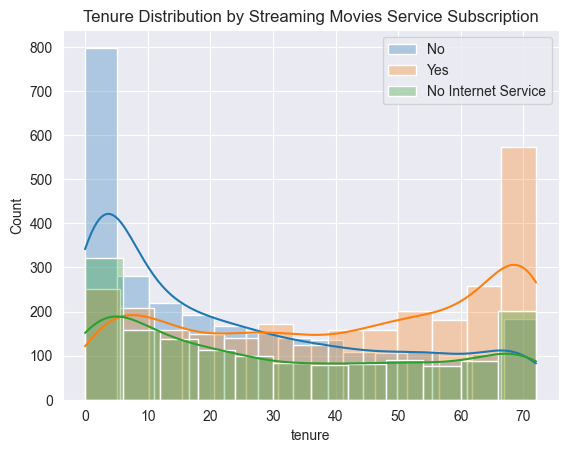

In [32]:
sns.histplot(df.tenure[df.StreamingMovies == "No"], kde=True, alpha=0.3, label="No")
sns.histplot(df.tenure[df.StreamingMovies == "Yes"], kde=True, alpha=0.3, label="Yes")
sns.histplot(df.tenure[df.StreamingMovies == "No internet service"], kde=True, alpha=0.3, label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

### InternetService

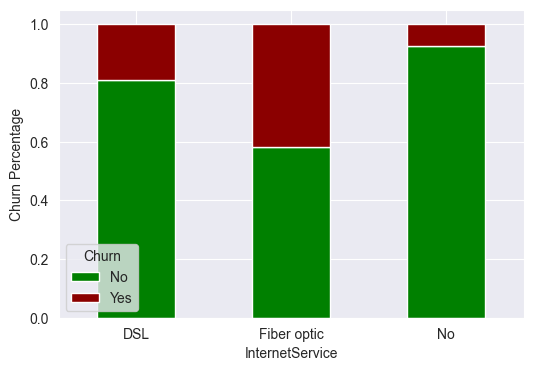

In [27]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

<Axes: xlabel='InternetService', ylabel='count'>

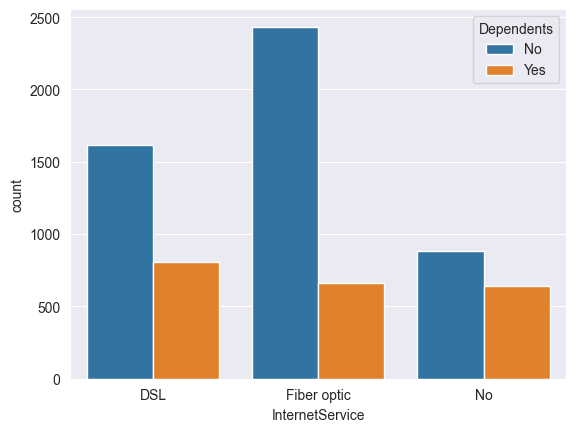

In [34]:
sns.countplot(x="InternetService", hue="Dependents", data=df)

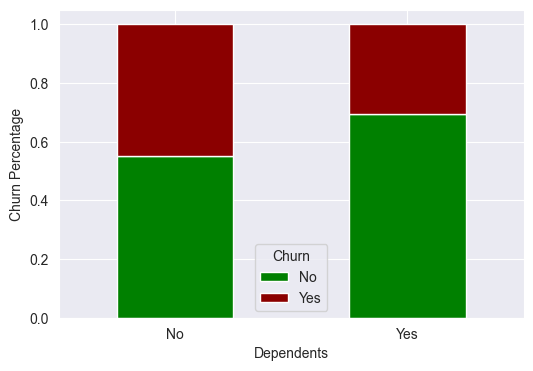

In [35]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<Axes: xlabel='InternetService', ylabel='count'>

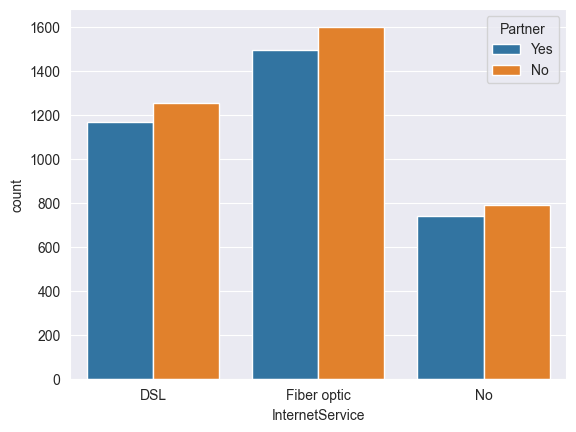

In [37]:
sns.countplot(x="InternetService", hue="Partner", data=df)

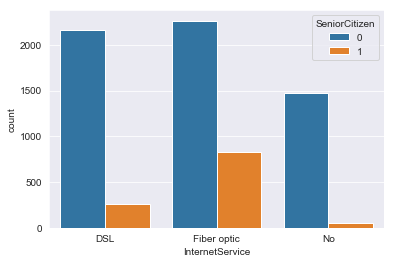

In [ ]:
sns.countplot(df.InternetService, hue = df.SeniorCitizen)

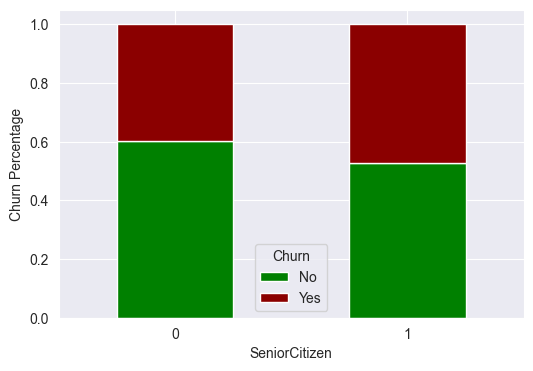

In [38]:
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")


As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

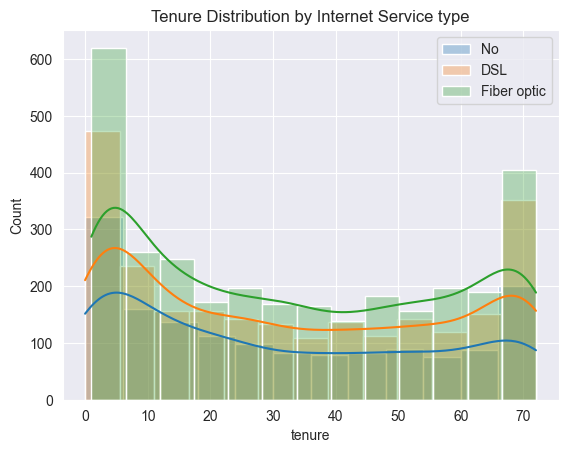

In [40]:
sns.histplot(df.tenure[df.InternetService == "No"], kde=True, alpha=0.3, label="No")
sns.histplot(df.tenure[df.InternetService == "DSL"], kde=True, alpha=0.3, label="DSL")
sns.histplot(df.tenure[df.InternetService == "Fiber optic"], kde=True, alpha=0.3, label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

In [41]:
df[df.InternetService == 'No'].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,2
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,5
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No,1
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No,1


In [42]:
df[df.InternetService == 'No'].OnlineSecurity.value_counts()

OnlineSecurity
No internet service    1526
Name: count, dtype: int64

In [43]:
df[df.InternetService == 'No'].OnlineBackup.value_counts()

OnlineBackup
No internet service    1526
Name: count, dtype: int64

In [44]:
df[df.InternetService == 'No'].DeviceProtection.value_counts()

DeviceProtection
No internet service    1526
Name: count, dtype: int64

In [45]:
df[df.InternetService == 'No'].TechSupport.value_counts()

TechSupport
No internet service    1526
Name: count, dtype: int64

In [46]:
df[df.InternetService == 'No'].StreamingMovies.value_counts()

StreamingMovies
No internet service    1526
Name: count, dtype: int64

In [47]:
df[df.InternetService == 'No'].StreamingTV.value_counts()

StreamingTV
No internet service    1526
Name: count, dtype: int64

We need to encode these variables to remove dependancy in the model.

### Contract

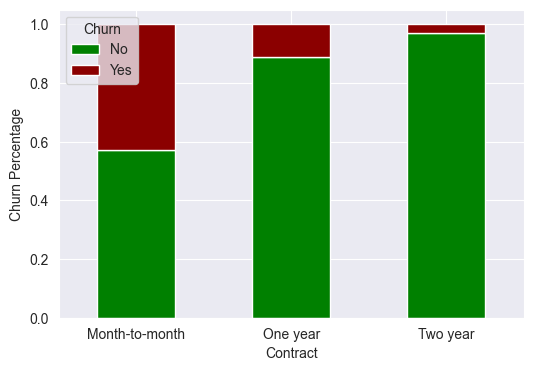

In [48]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<Axes: xlabel='InternetService', ylabel='count'>

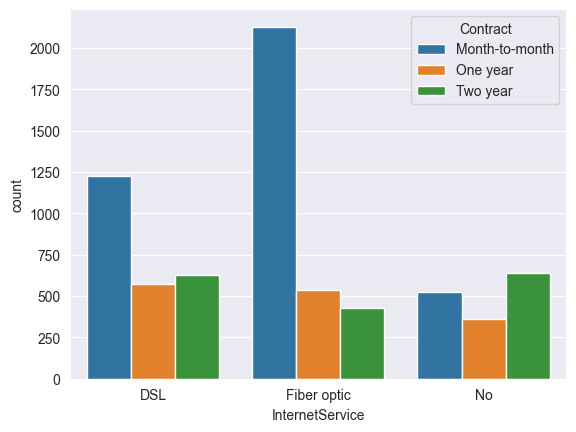

In [50]:
sns.countplot(x="InternetService", hue="Contract", data=df)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### PaymentMethod

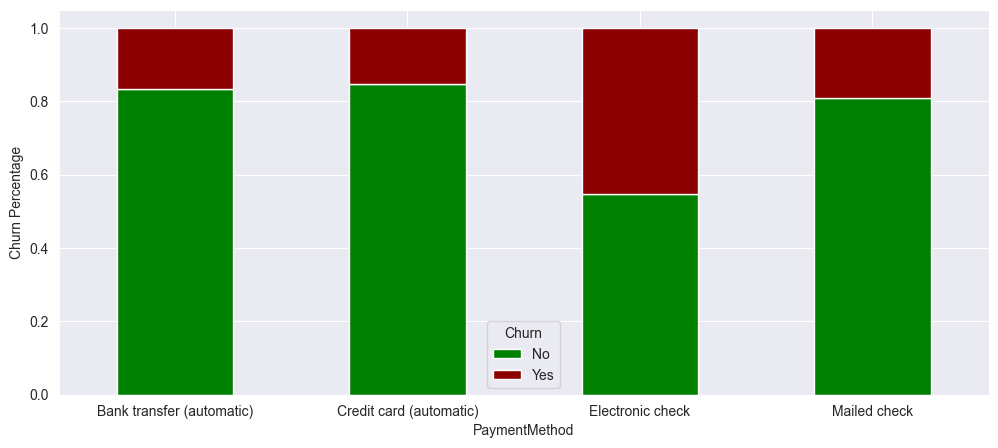

In [51]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high. 

<Axes: xlabel='PaymentMethod', ylabel='count'>

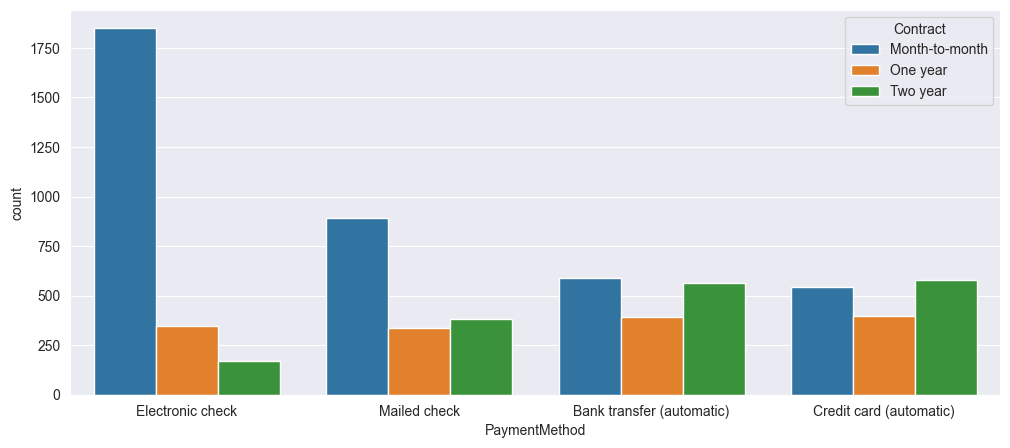

In [53]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x="PaymentMethod", hue="Contract", data=df, ax=ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment. 

### PaperlessBilling

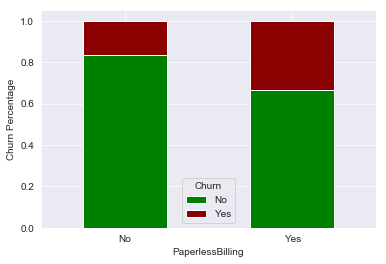

In [ ]:
stacked_plot(df, "PaperlessBilling", "Churn")

### TotalCharges

In [54]:
df.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [55]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum() 

np.int64(11)

In [56]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [57]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

np.False_

In [58]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

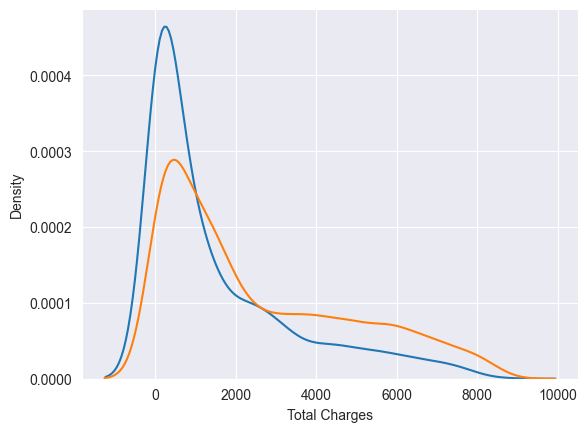

In [59]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

### Monthly Charges

In [60]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [61]:
df.MonthlyCharges.isna().sum()

np.int64(0)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

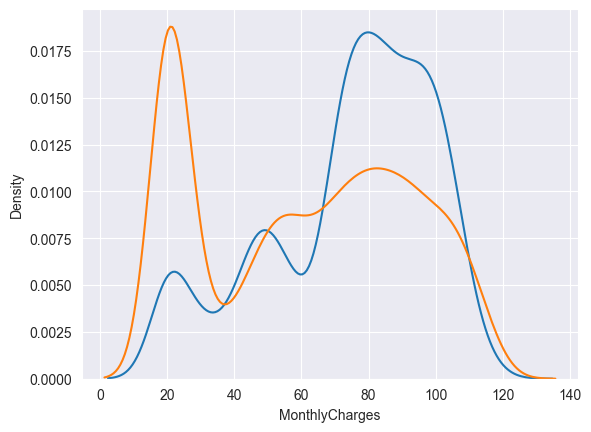

In [62]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [63]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

Let's keep total charges as it shows the interaction between tenure and monthly charges

## Fucntion to prepare data for model building based on EDA

In [64]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df